In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

khadiza13_less_data_path = kagglehub.dataset_download('khadiza13/less-data')

print('Data source import complete.')


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from tqdm import tqdm
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from transformers import AutoTokenizer, AutoModel
import timm
import matplotlib.pyplot as plt

In [ ]:
csv_path = "/kaggle/input/less-data/changed_ds/new_ds_small.csv"
img_dir = "/kaggle/input/less-data/changed_ds/img"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
label2idx = {
    "stereotype & objectification": 0,
    "violence or abuse": 1,
    "non-misogynistic": 2
}
idx2label = {v: k for k, v in label2idx.items()}

tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

2025-06-29 05:45:04.392395: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751175904.594376      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751175904.649824      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/443M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]


Epoch 1


  0%|          | 0/200 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 3.0081, Train Acc: 0.4953, Train F1: 0.4626
Val Loss: 2.6101, Val Acc: 0.6600, Val F1: 0.6523

Epoch 2


  0%|          | 0/200 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 2.2422, Train Acc: 0.7484, Train F1: 0.7476
Val Loss: 2.3158, Val Acc: 0.7275, Val F1: 0.7256

Epoch 3


  0%|          | 0/200 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 1.6500, Train Acc: 0.8588, Train F1: 0.8588
Val Loss: 2.4977, Val Acc: 0.7125, Val F1: 0.7131

Epoch 4


  0%|          | 0/200 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 1.1903, Train Acc: 0.9272, Train F1: 0.9273
Val Loss: 2.6720, Val Acc: 0.7100, Val F1: 0.7104

Epoch 5


  0%|          | 0/200 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.9454, Train Acc: 0.9603, Train F1: 0.9603
Val Loss: 2.9922, Val Acc: 0.7000, Val F1: 0.7002

Epoch 6


  0%|          | 0/200 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.7092, Train Acc: 0.9809, Train F1: 0.9809
Val Loss: 3.0979, Val Acc: 0.7250, Val F1: 0.7251

Epoch 7


  0%|          | 0/200 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.5827, Train Acc: 0.9894, Train F1: 0.9894
Val Loss: 3.2979, Val Acc: 0.7225, Val F1: 0.7218

Epoch 8


  0%|          | 0/200 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.4775, Train Acc: 0.9934, Train F1: 0.9934
Val Loss: 3.4171, Val Acc: 0.7350, Val F1: 0.7364

Epoch 9


  0%|          | 0/200 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.3736, Train Acc: 0.9928, Train F1: 0.9928
Val Loss: 3.7695, Val Acc: 0.7425, Val F1: 0.7421

Epoch 10


  0%|          | 0/200 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.2990, Train Acc: 0.9934, Train F1: 0.9934
Val Loss: 4.1845, Val Acc: 0.6825, Val F1: 0.6807

Epoch 11


  0%|          | 0/200 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.2443, Train Acc: 0.9934, Train F1: 0.9934
Val Loss: 4.1042, Val Acc: 0.7275, Val F1: 0.7270

Epoch 12


  0%|          | 0/200 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.1752, Train Acc: 0.9969, Train F1: 0.9969
Val Loss: 4.1908, Val Acc: 0.7225, Val F1: 0.7207

Epoch 13


  0%|          | 0/200 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.1575, Train Acc: 0.9966, Train F1: 0.9966
Val Loss: 4.2970, Val Acc: 0.7125, Val F1: 0.7105

Epoch 14


  0%|          | 0/200 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.1193, Train Acc: 0.9978, Train F1: 0.9978
Val Loss: 4.2263, Val Acc: 0.7425, Val F1: 0.7423

Epoch 15


  0%|          | 0/200 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.0988, Train Acc: 0.9972, Train F1: 0.9972
Val Loss: 4.5038, Val Acc: 0.7450, Val F1: 0.7441

Epoch 16


  0%|          | 0/200 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.0936, Train Acc: 0.9975, Train F1: 0.9975
Val Loss: 4.5934, Val Acc: 0.7450, Val F1: 0.7427

Epoch 17


  0%|          | 0/200 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.0971, Train Acc: 0.9972, Train F1: 0.9972
Val Loss: 5.0026, Val Acc: 0.6900, Val F1: 0.6883

Epoch 18


  0%|          | 0/200 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.1111, Train Acc: 0.9966, Train F1: 0.9966
Val Loss: 4.8294, Val Acc: 0.6975, Val F1: 0.6983

Epoch 19


  0%|          | 0/200 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.0844, Train Acc: 0.9975, Train F1: 0.9975
Val Loss: 5.0014, Val Acc: 0.7200, Val F1: 0.7189

Epoch 20


  0%|          | 0/200 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.0705, Train Acc: 0.9972, Train F1: 0.9972
Val Loss: 5.0394, Val Acc: 0.7125, Val F1: 0.7139


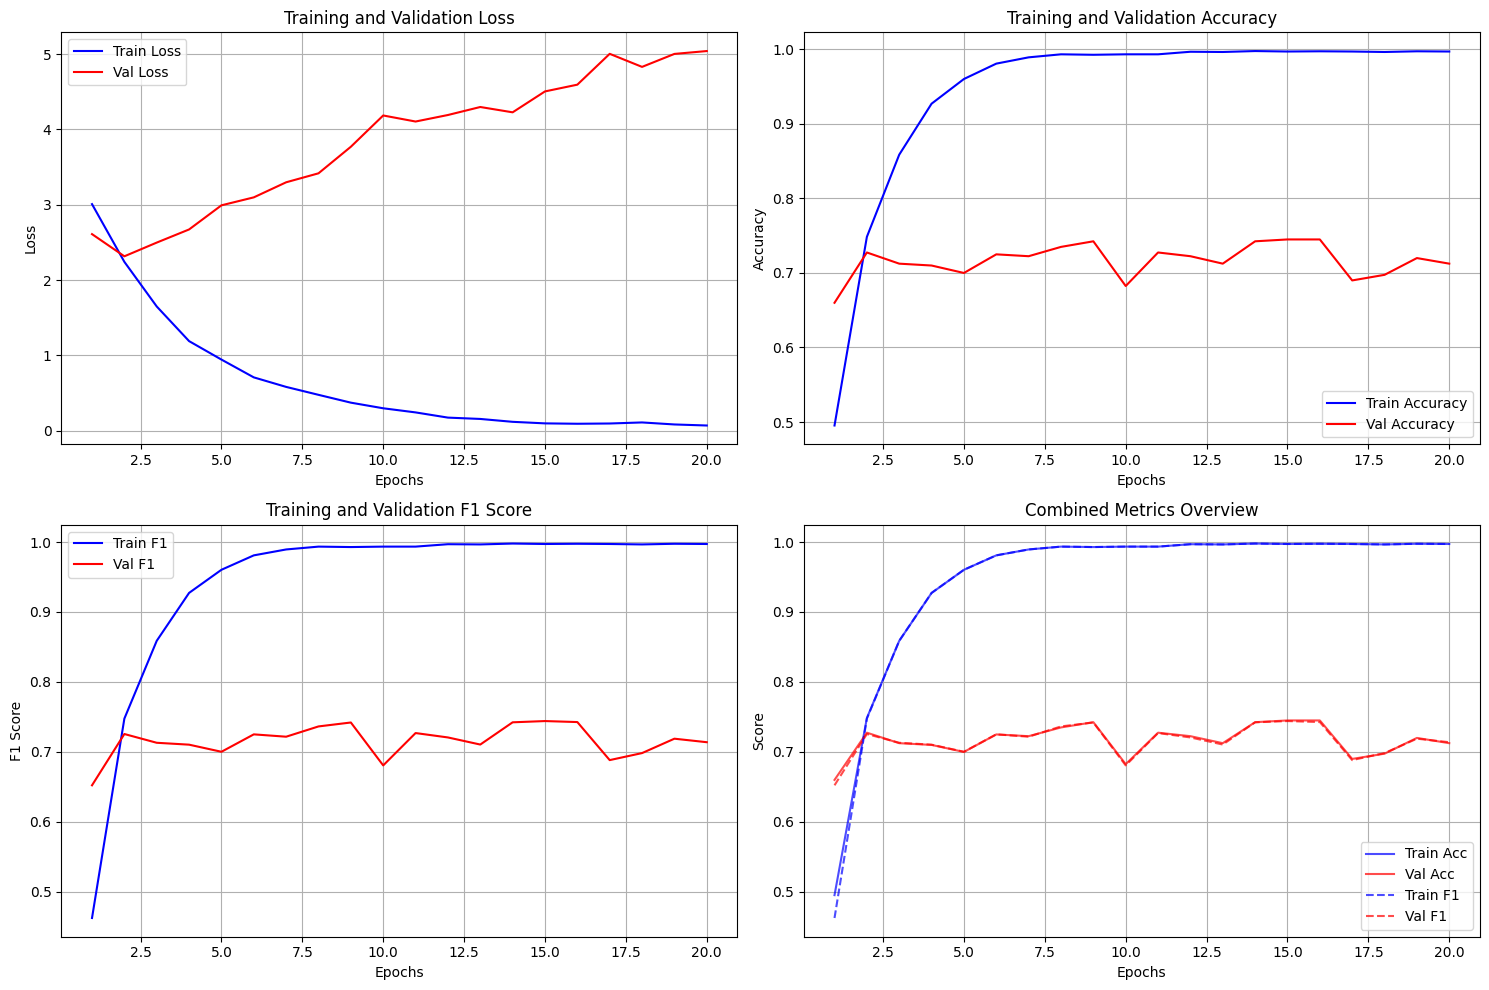


FINAL TEST RESULTS
Test Accuracy: 0.7357
Test F1 Score: 0.7367
Test Precision: 0.7424
Test Recall: 0.7357

Classification Report:
                              precision    recall  f1-score   support

stereotype & objectification       0.74      0.76      0.75       166
           violence or abuse       0.66      0.74      0.70       109
            non-misogynistic       0.82      0.70      0.76       126

                    accuracy                           0.74       401
                   macro avg       0.74      0.73      0.73       401
                weighted avg       0.74      0.74      0.74       401



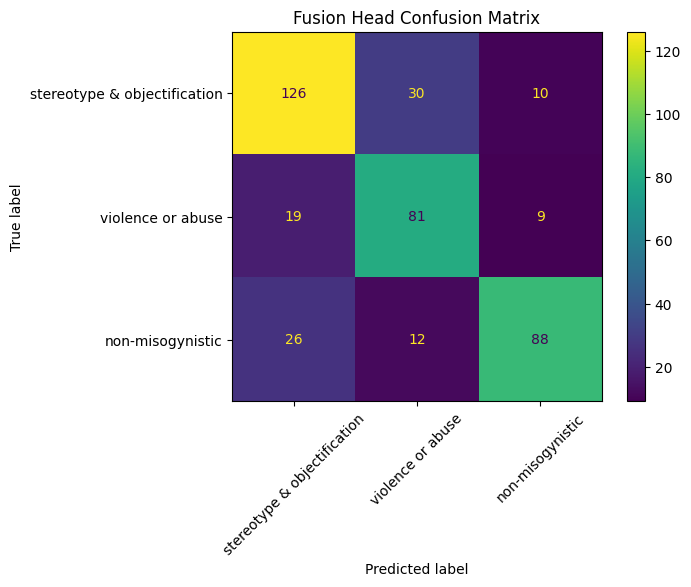


✅ Model saved successfully!
📁 Model file: saved_models/multimodal_model_for_xai.pth
📁 Label encoder: saved_models/label_encoder.pkl
📁 Tokenizer config: saved_models/tokenizer_config.pkl
📁 Transform config: saved_models/transform_config.pkl


In [ ]:
from tqdm.notebook import tqdm, trange
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# ======================= DATASET =========================
class MemeDataset(Dataset):
    def __init__(self, dataframe, img_dir, tokenizer, transform):
        self.data = dataframe
        self.img_dir = img_dir
        self.tokenizer = tokenizer
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        image_path = os.path.join(self.img_dir, row["image"])
        image = self.transform(Image.open(image_path).convert("RGB"))
        text = row["text"]
        label = label2idx[row["label"]]

        encoding = self.tokenizer(text, padding="max_length", truncation=True, max_length=64, return_tensors="pt")
        return {
            "image": image,
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "label": torch.tensor(label)
        }

# ======================= MODEL =========================
class MultiModalModel(nn.Module):
    def __init__(self, text_model_name="csebuetnlp/banglabert", image_model_name="efficientnet_b0", num_classes=3):
        super().__init__()

        # Text Encoder
        self.text_encoder = AutoModel.from_pretrained(text_model_name)
        self.text_proj = nn.Linear(self.text_encoder.config.hidden_size, 256)

        # Image Encoder
        self.image_encoder = timm.create_model(image_model_name, pretrained=True, num_classes=0)
        self.image_proj = nn.Linear(self.image_encoder.num_features, 256)

        # Fusion Layer (global + local)
        self.fusion = nn.Sequential(
            nn.Linear(256 * 2, 256),
            nn.ReLU(),
            nn.Dropout(0.3)
        )

        # Multi-task heads
        self.text_head = nn.Linear(256, num_classes)
        self.image_head = nn.Linear(256, num_classes)
        self.fusion_head = nn.Linear(256, num_classes)

    def forward(self, input_ids, attention_mask, image):
        # Text
        text_outputs = self.text_encoder(input_ids=input_ids, attention_mask=attention_mask)
        text_global = text_outputs.last_hidden_state[:, 0]  # [CLS] token
        text_embed = self.text_proj(text_global)

        # Image
        image_global = self.image_encoder(image)
        image_embed = self.image_proj(image_global)

        # Fusion
        combined = torch.cat([text_embed, image_embed], dim=1)
        fused = self.fusion(combined)

        # Heads
        text_logits = self.text_head(text_embed)
        image_logits = self.image_head(image_embed)
        fusion_logits = self.fusion_head(fused)

        return text_logits, image_logits, fusion_logits

# ======================= TRAINING =========================
def train_epoch(model, dataloader, optimizer, criterion):
    model.train()
    total_loss = 0
    all_preds = []
    all_labels = []

    for batch in tqdm(dataloader):
        optimizer.zero_grad()
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        image = batch["image"].to(device)
        label = batch["label"].to(device)

        text_logits, image_logits, fusion_logits = model(input_ids, attention_mask, image)

        loss_text = criterion(text_logits, label)
        loss_image = criterion(image_logits, label)
        loss_fusion = criterion(fusion_logits, label)

        loss = loss_text + loss_image + loss_fusion
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        # Get predictions for metrics
        pred = torch.argmax(fusion_logits, dim=1)
        all_preds.extend(pred.cpu().numpy())
        all_labels.extend(label.cpu().numpy())

    # Calculate metrics
    avg_loss = total_loss / len(dataloader)
    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')

    return avg_loss, accuracy, f1

def evaluate(model, dataloader, criterion=None):
    model.eval()
    preds, labels = [], []
    total_loss = 0

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            image = batch["image"].to(device)
            label = batch["label"].to(device)

            text_logits, image_logits, fusion_logits = model(input_ids, attention_mask, image)

            if criterion is not None:
                loss_text = criterion(text_logits, label)
                loss_image = criterion(image_logits, label)
                loss_fusion = criterion(fusion_logits, label)
                loss = loss_text + loss_image + loss_fusion
                total_loss += loss.item()

            pred = torch.argmax(fusion_logits, dim=1)
            preds.extend(pred.cpu().numpy())
            labels.extend(label.cpu().numpy())

    # Calculate metrics
    accuracy = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')
    avg_loss = total_loss / len(dataloader) if criterion is not None else None

    return preds, labels, avg_loss, accuracy, f1

# ======================= PREP =========================
df = pd.read_csv(csv_path)
df = df.rename(columns={"Unnamed: 0": "image"})

tokenizer = AutoTokenizer.from_pretrained("csebuetnlp/banglabert")
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

dataset = MemeDataset(df, img_dir, tokenizer, transform)

# Split
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_ds, val_ds, test_ds = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=16)
test_loader = DataLoader(test_ds, batch_size=16)

# Model
model = MultiModalModel().to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()

# ======================= METRICS TRACKING =========================
train_losses = []
train_accuracies = []
train_f1_scores = []
val_losses = []
val_accuracies = []
val_f1_scores = []

# ======================= TRAIN LOOP =========================
for epoch in range(20):
    print(f"\nEpoch {epoch+1}")

    # Training
    train_loss, train_acc, train_f1 = train_epoch(model, train_loader, optimizer, criterion)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)

    # Validation
    _, _, val_loss, val_acc, val_f1 = evaluate(model, val_loader, criterion)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_f1_scores.append(val_f1)

    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Train F1: {train_f1:.4f}")
    print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, Val F1: {val_f1:.4f}")

# ======================= TRAINING CURVES =========================
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
epochs = range(1, 21)

# Loss curve
axes[0, 0].plot(epochs, train_losses, 'b-', label='Train Loss')
axes[0, 0].plot(epochs, val_losses, 'r-', label='Val Loss')
axes[0, 0].set_title('Training and Validation Loss')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Accuracy curve
axes[0, 1].plot(epochs, train_accuracies, 'b-', label='Train Accuracy')
axes[0, 1].plot(epochs, val_accuracies, 'r-', label='Val Accuracy')
axes[0, 1].set_title('Training and Validation Accuracy')
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True)

# F1 Score curve
axes[1, 0].plot(epochs, train_f1_scores, 'b-', label='Train F1')
axes[1, 0].plot(epochs, val_f1_scores, 'r-', label='Val F1')
axes[1, 0].set_title('Training and Validation F1 Score')
axes[1, 0].set_xlabel('Epochs')
axes[1, 0].set_ylabel('F1 Score')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Combined metrics
axes[1, 1].plot(epochs, train_accuracies, 'b-', label='Train Acc', alpha=0.7)
axes[1, 1].plot(epochs, val_accuracies, 'r-', label='Val Acc', alpha=0.7)
axes[1, 1].plot(epochs, train_f1_scores, 'b--', label='Train F1', alpha=0.7)
axes[1, 1].plot(epochs, val_f1_scores, 'r--', label='Val F1', alpha=0.7)
axes[1, 1].set_title('Combined Metrics Overview')
axes[1, 1].set_xlabel('Epochs')
axes[1, 1].set_ylabel('Score')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

# ======================= FINAL TEST EVALUATION =========================
test_preds, test_labels, _, test_acc, test_f1 = evaluate(model, test_loader)

# Calculate additional test metrics
test_precision = precision_score(test_labels, test_preds, average='weighted')
test_recall = recall_score(test_labels, test_preds, average='weighted')

print("\n" + "="*50)
print("FINAL TEST RESULTS")
print("="*50)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print("="*50)

print("\nClassification Report:")
print(classification_report(test_labels, test_preds, target_names=label2idx.keys()))

# ======================= CONFUSION MATRIX =========================
cm = confusion_matrix(test_labels, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label2idx.keys())
disp.plot(xticks_rotation=45)
plt.title("Fusion Head Confusion Matrix")
plt.show()

# ======================= SAVE MODEL FOR EXPLAINABLE AI =========================
import joblib
import os

# Create directory if it doesn't exist
save_dir = "saved_models"
os.makedirs(save_dir, exist_ok=True)

# Save the complete model
model_save_path = os.path.join(save_dir, "multimodal_model_for_xai.pth")
torch.save({
    'model_state_dict': model.state_dict(),
    'model_config': {
        'text_model_name': "csebuetnlp/banglabert",
        'image_model_name': "efficientnet_b0",
        'num_classes': len(label2idx)
    },
    'label2idx': label2idx,
    'idx2label': {v: k for k, v in label2idx.items()},
    'tokenizer_name': "csebuetnlp/banglabert",
    'training_metrics': {
        'train_losses': train_losses,
        'train_accuracies': train_accuracies,
        'train_f1_scores': train_f1_scores,
        'val_losses': val_losses,
        'val_accuracies': val_accuracies,
        'val_f1_scores': val_f1_scores,
        'final_test_accuracy': test_acc,
        'final_test_f1': test_f1,
        'final_test_precision': test_precision,
        'final_test_recall': test_recall
    },
    'model_architecture': 'MultiModalModel',
    'text_embed_dim': 256,
    'image_embed_dim': 256,
    'fusion_dim': 256
}, model_save_path)

# Save label encoder separately for compatibility
label_encoder_path = os.path.join(save_dir, "label_encoder.pkl")
# Create a simple label encoder object
class SimpleLabelEncoder:
    def __init__(self, label2idx):
        self.classes_ = list(label2idx.keys())
        self.label2idx = label2idx
        self.idx2label = {v: k for k, v in label2idx.items()}

    def transform(self, labels):
        return [self.label2idx[label] for label in labels]

    def inverse_transform(self, indices):
        return [self.idx2label[idx] for idx in indices]

label_encoder = SimpleLabelEncoder(label2idx)
joblib.dump(label_encoder, label_encoder_path)

# Save tokenizer configuration
tokenizer_config_path = os.path.join(save_dir, "tokenizer_config.pkl")
tokenizer_config = {
    'model_name': "csebuetnlp/banglabert",
    'max_length': 64,
    'padding': 'max_length',
    'truncation': True
}
joblib.dump(tokenizer_config, tokenizer_config_path)

# Save image transform configuration
transform_config_path = os.path.join(save_dir, "transform_config.pkl")
transform_config = {
    'resize': (224, 224),
    'to_tensor': True,
    'normalize': None  # Add normalization params if you use them
}
joblib.dump(transform_config, transform_config_path)

print(f"\n✅ Model saved successfully!")
print(f"📁 Model file: {model_save_path}")
print(f"📁 Label encoder: {label_encoder_path}")
print(f"📁 Tokenizer config: {tokenizer_config_path}")
print(f"📁 Transform config: {transform_config_path}")

In [ ]:
import os
import pandas as pd
import torch
import joblib
from PIL import Image
from torchvision import transforms
from transformers import AutoTokenizer, AutoModel
import timm
import torch.nn as nn

# ============ SETUP ============ #
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
img_dir = "/kaggle/input/less-data/changed_ds/img"
csv_path = "/kaggle/input/less-data/changed_ds/new_ds_small.csv"

# ============ LOAD SAVED CONFIGS ============ #
label_encoder = joblib.load("/kaggle/working/saved_models/label_encoder.pkl")
tokenizer_config = joblib.load("/kaggle/working/saved_models/tokenizer_config.pkl")
transform_config = joblib.load("/kaggle/working/saved_models/transform_config.pkl")
checkpoint = torch.load("/kaggle/working/saved_models/multimodal_model_for_xai.pth", map_location=device, weights_only=False)
model_config = checkpoint['model_config']
idx2label = checkpoint['idx2label']

# ============ IMAGE TRANSFORM ============ #
image_transform = transforms.Compose([
    transforms.Resize(transform_config['resize']),
    transforms.ToTensor()
])

# ============ TOKENIZER ============ #
tokenizer = AutoTokenizer.from_pretrained(tokenizer_config['model_name'])

# ============ MODEL ARCHITECTURE ============ #
class MultiModalModel(nn.Module):
    def __init__(self, text_model_name, image_model_name, num_classes):
        super().__init__()
        self.text_encoder = AutoModel.from_pretrained(text_model_name)
        self.text_proj = nn.Linear(self.text_encoder.config.hidden_size, 256)

        self.image_encoder = timm.create_model(image_model_name, pretrained=True, num_classes=0)
        self.image_proj = nn.Linear(self.image_encoder.num_features, 256)

        self.fusion = nn.Sequential(
            nn.Linear(256 * 2, 256),
            nn.ReLU(),
            nn.Dropout(0.3)
        )

        self.text_head = nn.Linear(256, num_classes)
        self.image_head = nn.Linear(256, num_classes)
        self.fusion_head = nn.Linear(256, num_classes)

    def forward(self, input_ids, attention_mask, image):
        text_outputs = self.text_encoder(input_ids=input_ids, attention_mask=attention_mask)
        text_embed = self.text_proj(text_outputs.last_hidden_state[:, 0])
        image_embed = self.image_proj(self.image_encoder(image))
        combined = torch.cat([text_embed, image_embed], dim=1)
        fused = self.fusion(combined)
        return self.text_head(text_embed), self.image_head(image_embed), self.fusion_head(fused)

# ============ LOAD MODEL ============ #
model = MultiModalModel(
    text_model_name=model_config['text_model_name'],
    image_model_name=model_config['image_model_name'],
    num_classes=model_config['num_classes']
).to(device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

# ============ LOAD SAMPLE DATA FROM CSV ============ #
df = pd.read_csv(csv_path)
df = df.rename(columns={"Unnamed: 0": "image"}) if "Unnamed: 0" in df.columns else df
sample = df.sample(1).iloc[0]
text = sample['text']
image_path = os.path.join(img_dir, sample['image'])

# ============ INFERENCE FUNCTION ============ #
def predict(text, image_path):
    # Prepare image
    image = Image.open(image_path).convert("RGB")
    image_tensor = image_transform(image).unsqueeze(0).to(device)

    # Tokenize text
    tokens = tokenizer(
        text,
        padding=tokenizer_config['padding'],
        truncation=tokenizer_config['truncation'],
        max_length=tokenizer_config['max_length'],
        return_tensors="pt"
    )
    input_ids = tokens['input_ids'].to(device)
    attention_mask = tokens['attention_mask'].to(device)

    # Run model
    with torch.no_grad():
        _, _, fusion_logits = model(input_ids, attention_mask, image_tensor)
        pred_idx = fusion_logits.argmax(dim=1).item()
        pred_label = idx2label[pred_idx]

    return pred_label

# ============ RUN PREDICTION ============ #
print("📷 Image:", sample['image'])
print("📝 Text:", text)
print("🔍 Predicted Label:", predict(text, image_path))


📷 Image: pin 24.jpg
📝 Text: শিক্ষা মন্ত্রী টুকে পাশ শিল্প টাইম পাস অর্থ মন্ত্রী দিচ্ছে বাঁশ ক্রীড়ামন্ত্রী কারাবাস নগর মন্ত্রী ঘুষ খাস কৃষি মন্ত্রী ফোর পাস বাকি গুলো দলদাস মুখ্য মন্ত্রী সর্বনাশ বঙ্গবাসীর লন্ডন বাস
🔍 Predicted Label: non-misogynistic


🔍 Predicted Label: violence or abuse (99.97%)


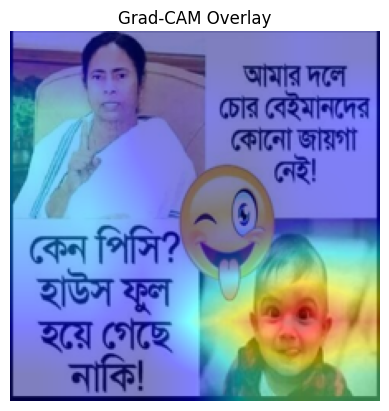

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import cv2

# ----------------- GRAD-CAM HELPER ----------------- #
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self.hook_handles = []
        self._register_hooks()

    def _register_hooks(self):
        def forward_hook(module, input, output):
            self.activations = output.detach()

        def backward_hook(module, grad_input, grad_output):
            self.gradients = grad_output[0].detach()

        self.hook_handles.append(self.target_layer.register_forward_hook(forward_hook))
        self.hook_handles.append(self.target_layer.register_backward_hook(backward_hook))

    def generate(self, input_ids, attention_mask, image_tensor, class_idx=None):
        self.model.eval()
        self.model.zero_grad()

        # Forward pass
        _, _, fusion_logits = self.model(input_ids, attention_mask, image_tensor)
        probs = F.softmax(fusion_logits, dim=1)
        pred_idx = fusion_logits.argmax(dim=1).item() if class_idx is None else class_idx

        # Backward pass
        loss = fusion_logits[0, pred_idx]
        loss.backward()

        # Grad-CAM calculation
        gradients = self.gradients[0]       # [C, H, W]
        activations = self.activations[0]   # [C, H, W]

        weights = gradients.mean(dim=(1, 2))  # Global average pooling
        cam = (weights.view(-1, 1, 1) * activations).sum(0)
        cam = F.relu(cam)
        cam = cam / cam.max()
        cam_np = cam.cpu().numpy()

        return cam_np, pred_idx, probs[0, pred_idx].item()

    def clear_hooks(self):
        for handle in self.hook_handles:
            handle.remove()

# ----------------- PLOT GRAD-CAM ----------------- #
def show_gradcam_on_image(img_pil, cam, alpha=0.5):
    img = np.array(img_pil.resize((224, 224))).astype(np.float32) / 255.0
    cam_resized = cv2.resize(cam, (224, 224))
    heatmap = cv2.applyColorMap(np.uint8(255 * cam_resized), cv2.COLORMAP_JET)
    heatmap = heatmap[..., ::-1] / 255.0   # BGR to RGB
    overlay = img * (1 - alpha) + heatmap * alpha
    plt.imshow(np.clip(overlay, 0, 1))
    plt.axis('off')
    plt.title("Grad-CAM Overlay")
    plt.show()


# Pick sample again
sample = df.sample(1).iloc[0]
text = sample["text"]
image_path = os.path.join(img_dir, sample["image"])
img_pil = Image.open(image_path).convert("RGB")
image_tensor = image_transform(img_pil).unsqueeze(0).to(device)

# Tokenize text
tokens = tokenizer(
    text,
    padding=tokenizer_config['padding'],
    truncation=tokenizer_config['truncation'],
    max_length=tokenizer_config['max_length'],
    return_tensors="pt"
)
input_ids = tokens["input_ids"].to(device)
attention_mask = tokens["attention_mask"].to(device)

# Setup Grad-CAM for the last conv layer of EfficientNet
target_layer = model.image_encoder.conv_head  # EfficientNet-B0 last conv
cam = GradCAM(model, target_layer)

# Generate CAM
cam_map, pred_idx, conf = cam.generate(input_ids, attention_mask, image_tensor)
pred_label = idx2label[pred_idx]
print(f"🔍 Predicted Label: {pred_label} ({conf*100:.2f}%)")

# Show visualization
show_gradcam_on_image(img_pil, cam_map)
cam.clear_hooks()


Using: cuda

📘 Sample 1 | True Label: stereotype & objectification | Predicted: violence or abuse (0.64)


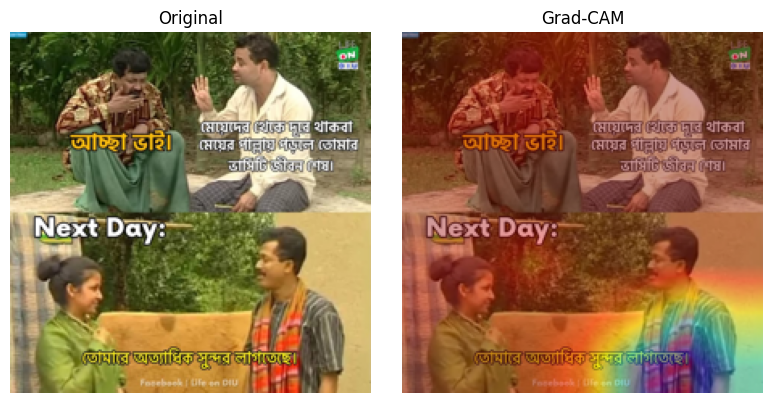

  0%|          | 0/498 [00:00<?, ?it/s]


📘 Sample 2 | True Label: stereotype & objectification | Predicted: stereotype & objectification (1.00)


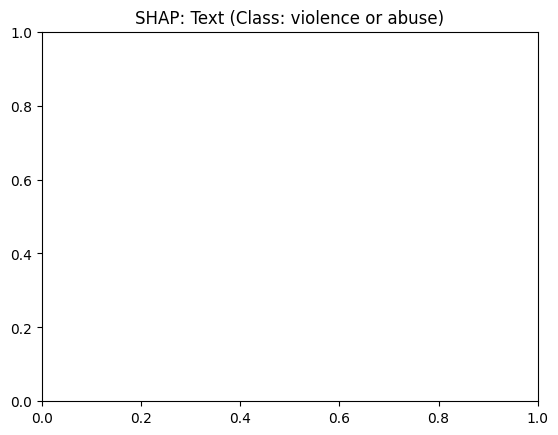

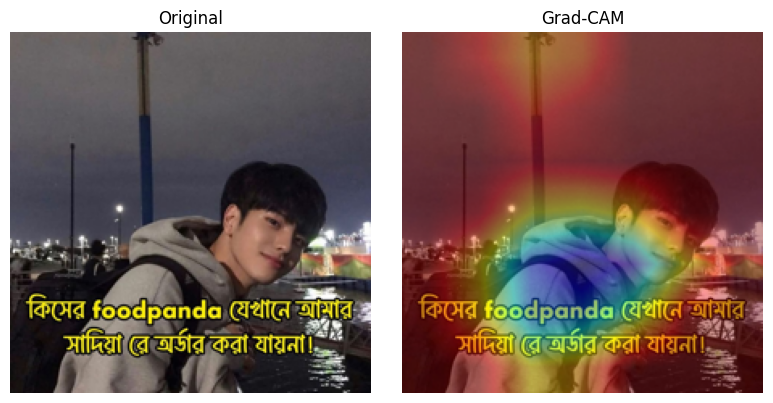

  0%|          | 0/210 [00:00<?, ?it/s]


📘 Sample 3 | True Label: violence or abuse | Predicted: violence or abuse (1.00)


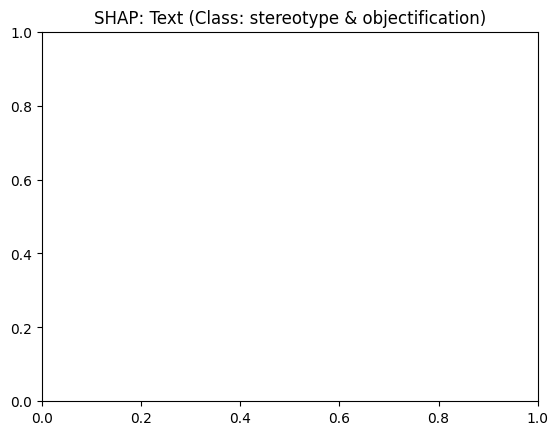

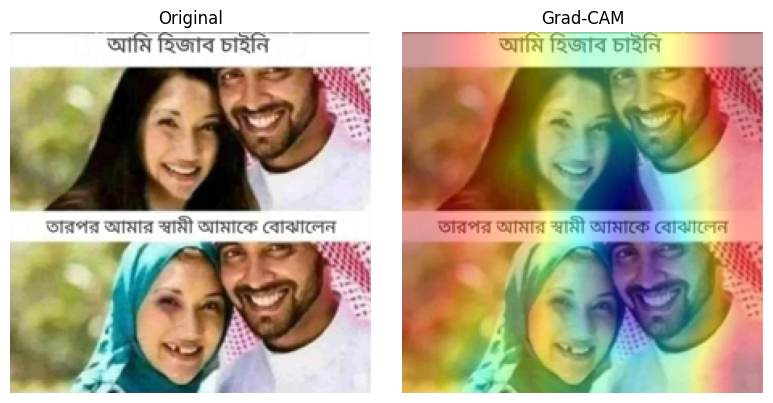


📘 Sample 4 | True Label: non-misogynistic | Predicted: non-misogynistic (1.00)


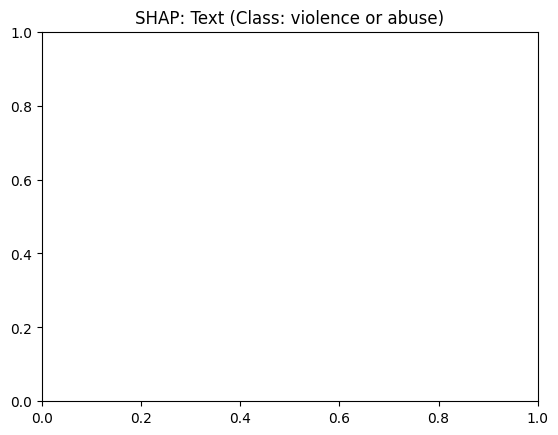

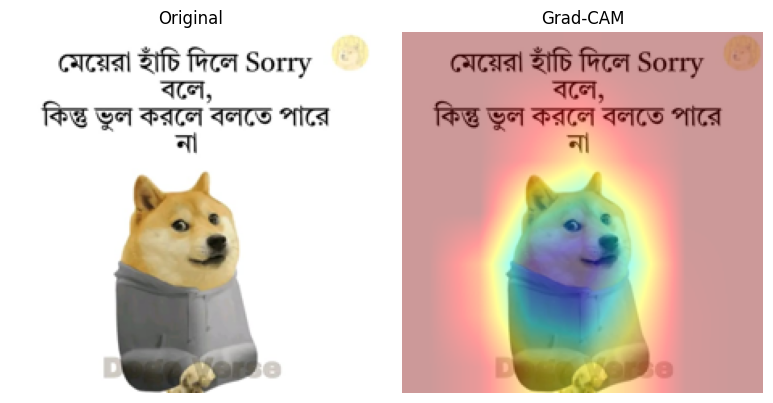


📘 Sample 5 | True Label: non-misogynistic | Predicted: non-misogynistic (1.00)


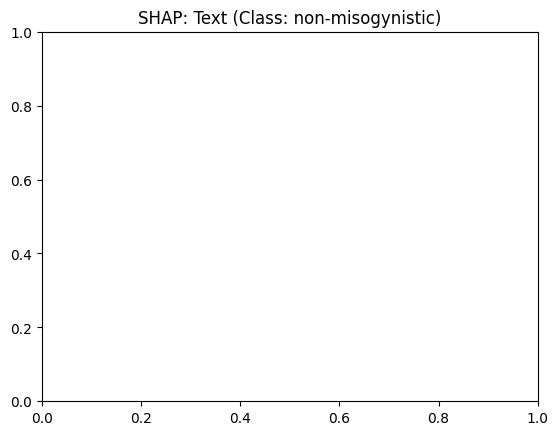

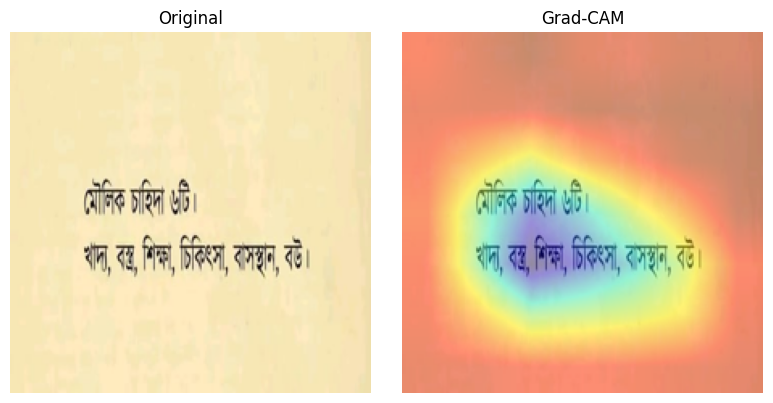

  0%|          | 0/342 [00:00<?, ?it/s]


📘 Sample 6 | True Label: non-misogynistic | Predicted: non-misogynistic (1.00)


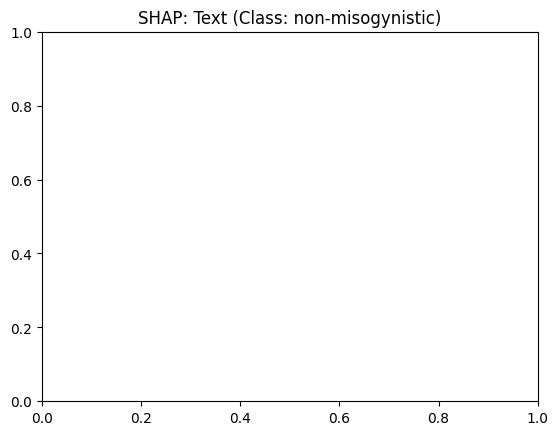

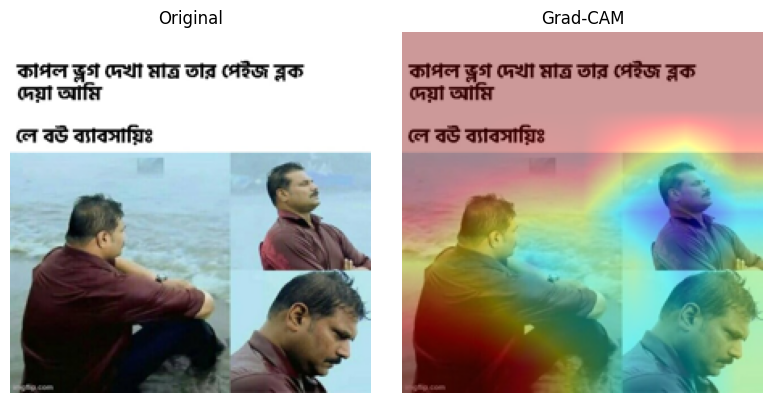


📘 Sample 7 | True Label: stereotype & objectification | Predicted: violence or abuse (0.99)


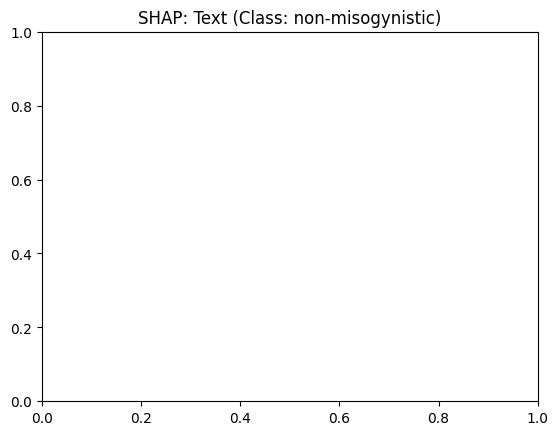

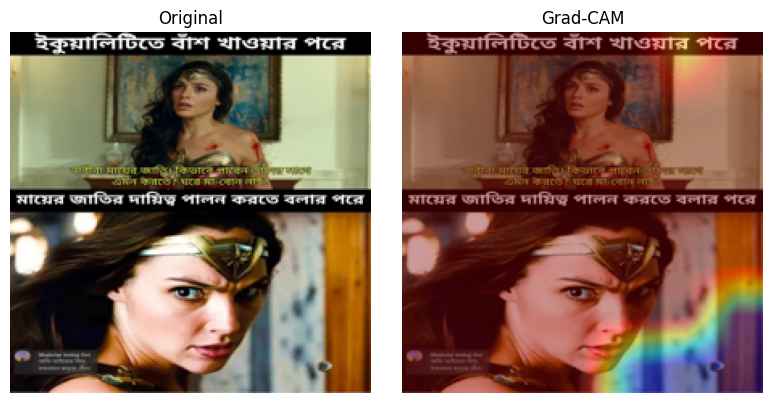

  0%|          | 0/498 [00:00<?, ?it/s]


📘 Sample 8 | True Label: violence or abuse | Predicted: violence or abuse (1.00)


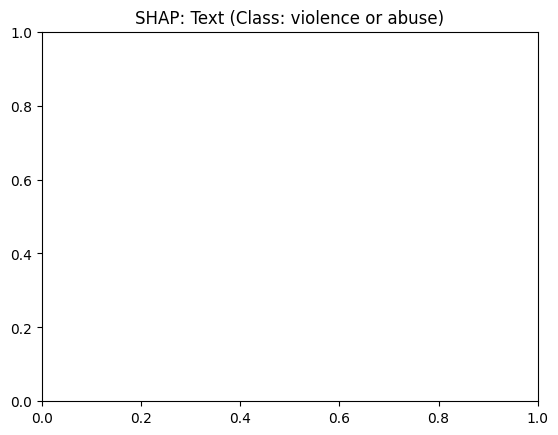

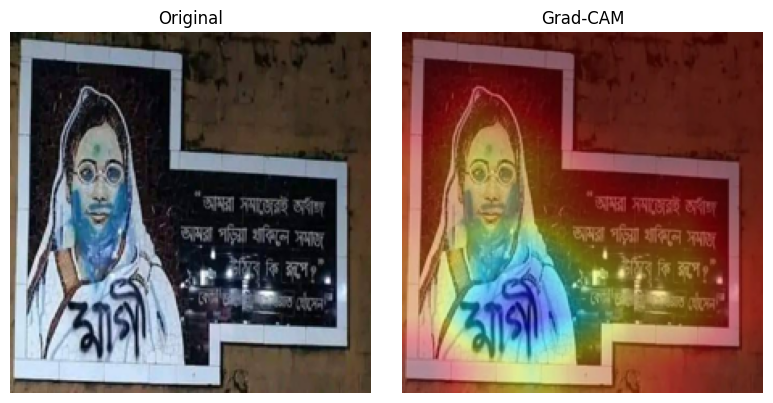

In [ ]:
import torch
import torch.nn.functional as F
from transformers import AutoTokenizer, AutoModel
import matplotlib.pyplot as plt
import numpy as np
import shap
import cv2
from PIL import Image
import pandas as pd
import joblib
import timm
import os
import torch.serialization
from torchvision import transforms
import numpy.core.multiarray

# Allowlist numpy.core.multiarray.scalar
torch.serialization.add_safe_globals([numpy.core.multiarray.scalar])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", device)

# Load saved model and metadata
checkpoint = torch.load("/kaggle/working/saved_models/multimodal_model_for_xai.pth", map_location=device, weights_only=False)
label_encoder = joblib.load("/kaggle/working/saved_models/label_encoder.pkl")
tokenizer_config = joblib.load("/kaggle/working/saved_models/tokenizer_config.pkl")
transform_config = joblib.load("/kaggle/working/saved_models/transform_config.pkl")

# Reconstruct tokenizer and transform
tokenizer = AutoTokenizer.from_pretrained(tokenizer_config['model_name'])
transform = transforms.Compose([
    transforms.Resize(transform_config['resize']),
    transforms.ToTensor(),
])

# Define MultiModalModel (same as training)
class MultiModalModel(nn.Module):
    def __init__(self, text_model_name="csebuetnlp/banglabert", image_model_name="efficientnet_b0", num_classes=3):
        super().__init__()
        self.text_encoder = AutoModel.from_pretrained(text_model_name)
        self.text_proj = nn.Linear(self.text_encoder.config.hidden_size, 256)
        self.image_encoder = timm.create_model(image_model_name, pretrained=True, num_classes=0)
        self.image_proj = nn.Linear(self.image_encoder.num_features, 256)
        self.fusion = nn.Sequential(
            nn.Linear(256 * 2, 256),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        self.text_head = nn.Linear(256, num_classes)
        self.image_head = nn.Linear(256, num_classes)
        self.fusion_head = nn.Linear(256, num_classes)

    def forward(self, input_ids, attention_mask, image):
        text_outputs = self.text_encoder(input_ids=input_ids, attention_mask=attention_mask)
        text_global = text_outputs.last_hidden_state[:, 0]
        text_embed = self.text_proj(text_global)
        image_global = self.image_encoder(image)
        image_embed = self.image_proj(image_global)
        combined = torch.cat([text_embed, image_embed], dim=1)
        fused = self.fusion(combined)
        text_logits = self.text_head(text_embed)
        image_logits = self.image_head(image_embed)
        fusion_logits = self.fusion_head(fused)
        return text_logits, image_logits, fusion_logits

# Load model
model = MultiModalModel().to(device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

# GradCAM for EfficientNet
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self.hook_handles = []
        self._register_hooks()

    def _register_hooks(self):
        def forward_hook(module, input, output):
            self.activations = output

        def backward_hook(module, grad_in, grad_out):
            self.gradients = grad_out[0]

        self.hook_handles.append(self.target_layer.register_forward_hook(forward_hook))
        self.hook_handles.append(self.target_layer.register_full_backward_hook(backward_hook))

    def __call__(self, input_ids, attention_mask, image, class_idx):
        self.model.zero_grad()
        text_logits, image_logits, fusion_logits = self.model(input_ids, attention_mask, image)
        target = fusion_logits[:, class_idx]
        target.backward()

        gradients = self.gradients.detach().cpu().numpy()
        activations = self.activations.detach().cpu().numpy()
        weights = np.mean(gradients, axis=(2, 3))
        cam = np.zeros(activations.shape[2:], dtype=np.float32)

        for i, w in enumerate(weights[0]):
            cam += w * activations[0, i]

        cam = np.maximum(cam, 0)
        cam = cv2.resize(cam, (224, 224))
        cam = cam - np.min(cam)
        cam = cam / (np.max(cam) + 1e-8)
        return cam

    def __del__(self):
        for handle in self.hook_handles:
            handle.remove()

def visualize_gradcam(image_path, input_ids, attention_mask, class_idx):
    img = Image.open(image_path).convert("RGB")
    img_tensor = transform(img).unsqueeze(0).to(device)

    # Use the last convolutional layer of EfficientNet-B0
    target_layer = model.image_encoder.conv_head  # Depthwise conv in last block
    gradcam = GradCAM(model, target_layer)
    cam = gradcam(input_ids, attention_mask, img_tensor, class_idx)

    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    img_np = np.array(img.resize((224, 224)))
    overlay = cv2.addWeighted(img_np, 0.6, heatmap, 0.4, 0)

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].imshow(img_np)
    ax[0].set_title("Original")
    ax[0].axis("off")
    ax[1].imshow(overlay)
    ax[1].set_title("Grad-CAM")
    ax[1].axis("off")
    plt.tight_layout()
    plt.show()

# SHAP for text
def get_banglabert_embedding(text):
    tokens = tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=64).to(device)
    with torch.no_grad():
        return model.text_encoder(**tokens).last_hidden_state[:, 0]

def predict_shap(texts, class_idx):
    probs = []
    for text in texts:
        input_ids = tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=64)["input_ids"].to(device)
        attention_mask = tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=64)["attention_mask"].to(device)
        dummy_image = torch.zeros((1, 3, 224, 224)).to(device)

        with torch.no_grad():
            _, _, fusion_logits = model(input_ids, attention_mask, dummy_image)
            prob = F.softmax(fusion_logits, dim=1)[0, class_idx].item()
        probs.append(prob)
    return np.array(probs)

def show_shap(text, class_idx):
    masker = shap.maskers.Text(tokenizer)
    explainer = shap.Explainer(lambda x: predict_shap(x, class_idx), masker)
    shap_vals = explainer([text])
    shap.plots.text(shap_vals[0])
    plt.title(f"SHAP: Text (Class: {label_encoder.inverse_transform([class_idx])[0]})")

# Load dataset and sample
csv_path = "/kaggle/input/less-data/changed_ds/new_ds_small.csv"
img_dir = "/kaggle/input/less-data/changed_ds/img/"
df = pd.read_csv(csv_path)
label2idx = {
    "stereotype & objectification": 0,
    "violence or abuse": 1,
    "non-misogynistic": 2
}
# samples = df.sample(10, random_state=42).reset_index(drop=True)

# Specify indices for samples
selected_indices = [0, 1, 3, 411, 412, 440, 527, 555]  # Replace with your desired indices
samples = df.loc[selected_indices].reset_index(drop=True)

# Run XAI
for idx, row in samples.iterrows():
    img_path = os.path.join(img_dir, row["image"])
    text = row["text"]
    true_label = row["label"]

    # Prepare inputs
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=64)
    input_ids = inputs["input_ids"].to(device)
    attention_mask = inputs["attention_mask"].to(device)
    image = transform(Image.open(img_path).convert("RGB")).unsqueeze(0).to(device)

    # Predict
    with torch.no_grad():
        text_logits, image_logits, fusion_logits = model(input_ids, attention_mask, image)
        probs = F.softmax(fusion_logits, dim=1)
        pred_idx = torch.argmax(probs).item()
        pred_label = label_encoder.inverse_transform([pred_idx])[0]
        confidence = probs[0, pred_idx].item()

    print(f"\n📘 Sample {idx+1} | True Label: {true_label} | Predicted: {pred_label} ({confidence:.2f})")
    visualize_gradcam(img_path, input_ids, attention_mask, pred_idx)
    show_shap(text, pred_idx)